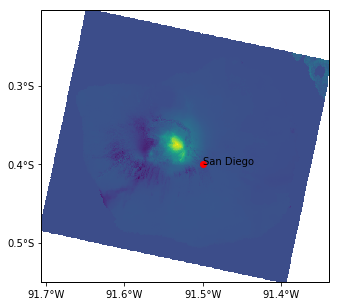

In [6]:
#%matplotlib notebook
import os
import sys
import argparse
from datetime import datetime as dt
import numpy as np
#import matplotlib; matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mintpy.objects import (geometryDatasetNames,
                            geometry,
                            ifgramDatasetNames,
                            ifgramStack,
                            timeseriesKeyNames,
                            timeseries)
from mintpy.objects.gps import GPS
from mintpy.utils import (ptime,
                         readfile,
                         utils as ut,
                         plot as pp)
from mintpy.multilook import multilook_data
from mintpy import subset, version


# get the path of the file. It can be found in the repo data directory.
fname = os.path.expanduser('~/insarlab/test/FernandinaSenDT128/mintpy/geo/geo_velocity.h5')
img, atr = readfile.read(fname)

#inps = view.cmd_line_parse('view.py {}'.format(fname).split()[1:])
coord = ut.coordinate(atr)
pixel_box = (0, 0, int(atr['WIDTH']), int(atr['LENGTH']))
geo_box = coord.box_pixel2geo(pixel_box)
#geo_box = subset.subset_input_dict2box(vars(inps), atr)[1]
#img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img_extent = (geo_box[0], geo_box[2], geo_box[3], geo_box[1])
#W, E, S N
#0, 2, 3, 1

fig, ax = plt.subplots(figsize=(6, 5), num='Figure')
#fig = plt.figure(figsize=(6, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
# add the image. Because this image was a tif, the "origin" of the image is in the upper left corner
ax.imshow(img, origin='upper', extent=img_extent)

ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_extent(img_extent)

# mark a known place to help us geo-locate ourselves
ax.plot(-91.5, -0.4, 'r.', markersize=12)
ax.text(-91.5, -0.4, 'San Diego')

plt.show()


In [4]:
str(ccrs.PlateCarree()).split('object')[0].split('<')[1].strip()

'cartopy.crs.PlateCarree'